<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Getting_started_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with Pandas
**pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the **Python** programming language.  
Source : [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/index.html)




---

# Data wrangling

## Import Pandas
Pandas is easily imported with the `import` statement in Python and conventionaly converted with the alias `as pd`.  
The `import` statement is the most common way of invoking the import machinery, when accessing Python code in one module.  Source : [Python.org](https://docs.python.org/3/reference/import.html) 

In [ ]:
import pandas as pd

## Import data
Many features are available for importing data according to the source and the format of your dataset.  
For this tutorial we are going to load a dataset stored in `.csv` format and available on Github.  
This dataset relates to weather observations from 2009 to 2020 in Orléans City (France). Source : [historique-meteo.net](https://www.historique-meteo.net/)  
Pandas dataset are nammed DataFrame : two-dimensional, size-mutable, potentially heterogeneous tabular data. 

In [ ]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/weather_orleans_2009_2020.csv"
df = pd.read_csv(url)

The `.head()` methods return the first `n` rows of the dataset.  
Further arguments are available for this function.

In [ ]:
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2009-01-01,3,-2,14,-1,3,-2,0.0,91,6.75,1028,18.625,3,0,-5,143,113,113,0.0,1,8.7,météo très défavorable
1,2009-01-02,1,-3,19,-3,1,-2,0.0,84,10.00,1027,10.250,1,0,-8,113,113,113,0.0,1,8.7,météo très défavorable
2,2009-01-03,1,-3,22,-2,1,-3,0.0,85,10.00,1026,14.000,1,0,-8,113,113,113,0.0,1,8.7,météo très défavorable
3,2009-01-04,-1,-5,8,-5,-1,-4,0.0,68,10.00,1026,29.875,0,0,-7,113,116,119,0.0,1,6.9,météo très défavorable
4,2009-01-05,-1,-5,12,-4,-1,-2,1.8,85,8.00,1021,72.875,0,0,-7,116,122,122,1.5,1,3.3,météo très défavorable


##Inspect data
One of the first steps to take is to become aware of the data in order to better understand their content and meaning.  
Inspection allows to become aware of the data.

###Inspection
Here some useful operations for better understanding of the dataset.  
The [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data) lists all available operations.

The index (row labels) of the DataFrame

In [ ]:
df.index

The column labels of the DataFrame.

In [ ]:
df.columns

Return the data types in the DataFrame.

In [ ]:
df.dtypes

Get some information about data and columns.

In [ ]:
df.info()

Return the number of elements in this object.

In [ ]:
df.size

Return a tuple representing the dimensionality of the DataFrame.

In [ ]:
df.shape

Get information about some `Nan` values.

In [ ]:
# The quantity of Nan
data.isna().sum()

In [ ]:
# The proportion (percentage) of Nan
data.isna().sum() / len(data)*100

###Description
Describing data means compute some descriptive indicators to get a synthetical representation of the data.

In [ ]:
df.describe()

By default only numerical features (variables) are included in the `.describe()` method. For complete description, the `include` argument / parameter is set to `'all'`

In [ ]:
df.describe(include='all')

##Access to data
Indexing operations are useful for accessing data based on index.  
The [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#indexing-iteration) lists all available operations.

### The `.loc()` method
Access a group of rows and columns by label(s) or a boolean array.

In [ ]:
# The first row
df.loc[0]

In [ ]:
# First even rows
df.loc[0:6:2]

In [ ]:
# A specific columns and all rows
df.loc[:,"TEMPERATURE_MORNING_C"]

In [ ]:
# Specific columns and rows
df.loc[0:10, ["TEMPERATURE_MORNING_C", "TEMPERATURE_NOON_C"]]

###The `.iloc()` method
Purely integer-location based indexing for selection by position.

In [ ]:
# The first row
df.iloc[0]

In [ ]:
# A specific columns and all rows
df.iloc[:, 1]

In [ ]:
# Specific columns and rows
df.iloc[0:10, 0:2]

In [ ]:
# Specific columns and rows
df.iloc[[0, 2], [0, 2]]

###The `.isin()` method
Whether each element in the DataFrame is contained in values.

In [ ]:
# Is the 0 value contained in the differents columns ?
df.isin([0])

In [ ]:
#Are the [0,1,2,3] values contained in the differents columns ?
df.isin([0,1,2,3])

In [ ]:
# Is the "météo très défavorable" value contained in the "OPINION" column only ?
df.isin({"OPINION": ["météo très défavorable"]})

###The `.where()` method
Replace values where the condition is False.

In [ ]:
# Where the max temperature is greater than 10?
df['MAX_TEMPERATURE_C'].where(df['MAX_TEMPERATURE_C'] > 10)

##Aggregation and grouping data
Aggregation data means combining data from several observations. When data is aggregated, groups of observations are summarised with summary statistics.  
The [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#function-application-groupby-window) lists all available operations.


Aggregate using one or more operations over the specified axis.

In [ ]:
# For the mean (average) of each columns
df.agg('mean')

In [ ]:
# For 3 different statistics of each columns
df.agg(['min', 'mean', 'max'])

In [ ]:
# For specific statistics accordingly the columns name
df.agg({'TEMPERATURE_MORNING_C' : 'min',
        'TEMPERATURE_NOON_C' : ['mean', 'median'],
        'TEMPERATURE_EVENING_C' : 'max'})

Group DataFrame using a mapper or by a Series of columns.

In [ ]:
df.groupby(['OPINION']).mean()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
OPINION,,,,,,,,,,,,,,,,,,,,
météo correcte,17.722286,9.187429,15.700571,10.185143,17.024000,14.696000,0.838971,75.100571,8.934000,1019.866286,42.049429,18.264000,11.442286,12.939429,136.012571,123.049143,121.238857,0.000000,1.0,10.917029
météo défavorable,14.989848,9.795685,19.554569,10.838832,14.335025,12.975888,2.667893,87.171320,8.059803,1016.223350,77.312500,15.239848,11.776650,10.714467,155.772843,137.651015,145.390863,0.000000,1.0,7.497335
météo favorable,22.915800,11.937630,13.271310,13.204782,22.104990,19.462578,0.380249,67.363825,9.257536,1020.727651,24.521050,24.068607,14.266112,18.255717,126.256757,114.640333,117.880457,0.000000,1.0,12.899896
météo idéale,28.664062,16.828125,13.125000,18.140625,27.804688,24.882812,0.313281,62.484375,9.616211,1018.859375,12.927734,29.546875,17.789062,23.890625,120.406250,113.000000,119.046875,0.000000,1.0,13.707031
météo très défavorable,7.147490,1.528185,18.023938,2.189961,6.555985,4.442471,1.110656,84.023938,8.719788,1020.422394,53.353282,7.352124,3.965251,0.467181,136.316602,123.737452,130.015444,0.038533,1.0,7.235985


In [ ]:
df.groupby(['OPINION']).mean()[['TEMPERATURE_NOON_C', 'PRECIP_TOTAL_DAY_MM', 'WINDSPEED_MAX_KMH', 'SUNHOUR']]

## Exercices

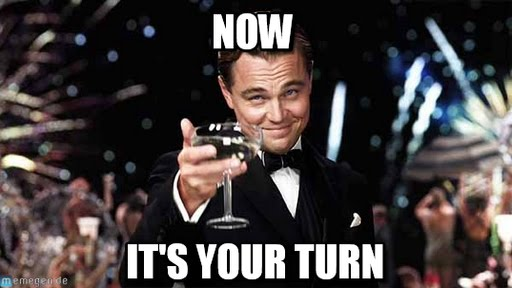

The goal of this exercice is to :
- Return the first 15 rows of the dataframe.
- Return the last 15 rows of the dataframe wit other method than the `.head()` method. *Tip : Query the web you will do.*
- What are the data types of the columns `MAX_TEMPERATURE_C`, `UV_INDEX` and `OPINION` ?
- Return the column `OPINION`.
- Return the colums `MAX_TEMPERATURE_C`, `UV_INDEX` and `OPINION`.
- Return the last 2 columns.
- Is the value `3` contained in the column `UV_INDEX` ?
- Give the following statistics `min`, `mean` and `max` by grouping the `UV_INDEX` column. *Tip : Query the web you will do.*

# Descriptive statistics
Descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information (i.e dataset).  
The [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) lists all available operations.


##Positional indicators


Mean :

In [ ]:
df['TEMPERATURE_NOON_C'].mean()

14.700098814229248

Median :

In [ ]:
df['TEMPERATURE_NOON_C'].median()

15.0

Mode : 

In [ ]:
df['TEMPERATURE_NOON_C'].mode()

0     9
1    10
dtype: int64

Quantiles :

In [ ]:
df['TEMPERATURE_NOON_C'].quantile(q=[0.05,0.25,0.5,0.75,0.95])

0.05     3.0
0.25     9.0
0.50    15.0
0.75    20.0
0.95    27.0
Name: TEMPERATURE_NOON_C, dtype: float64

Count :

In [ ]:
df['TEMPERATURE_NOON_C'].count()

4048

Value count :

In [ ]:
df['OPINION'].value_counts()

météo très défavorable    1295
météo favorable            962
météo correcte             875
météo défavorable          788
météo idéale               128
Name: OPINION, dtype: int64

##Statistical dispersion

Standard deviation :

In [ ]:
df['TEMPERATURE_NOON_C'].std()

7.384125379861788

Variance :

In [ ]:
df['TEMPERATURE_NOON_C'].var()

54.525307625519005

##Correlation
In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Source : [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)

In [ ]:
df[['TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'SUNHOUR']].corr()

,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,SUNHOUR
TEMPERATURE_NOON_C,1.000000,0.967388,0.694955
TEMPERATURE_EVENING_C,0.967388,1.000000,0.658612
SUNHOUR,0.694955,0.658612,1.000000


#Graphical description
There are many possibilities for exploring, describing and summarizing a dataset graphically. The choice of the type of graph depends mainly on the nature of the data:
- quantitative data: boxplot, histogram, scatterplot, heatmap, paiplot, hierarchical clustering ...
- qualitative data: pieplot, barplot, ...  
  
The [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting) lists all available operations.
  
Moreover some helpful tips and examples for choosing the best chart for your data: [From Data To Viz](https://www.data-to-viz.com/)

###Quantitative data


####Scatter plot

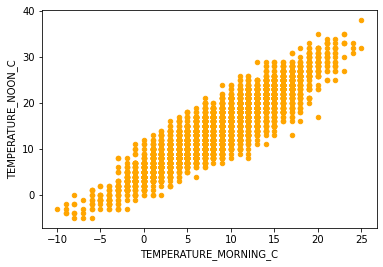

In [ ]:
df.plot.scatter(x='TEMPERATURE_MORNING_C', y='TEMPERATURE_NOON_C', c='Orange')

####Line plot

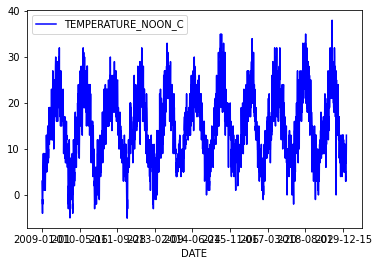

In [ ]:
df.plot.line(x='DATE', y='TEMPERATURE_NOON_C', c='Blue')

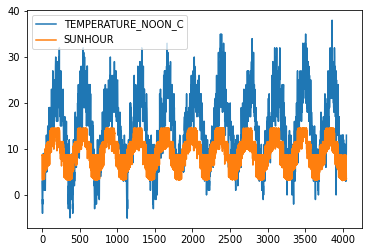

In [ ]:
df[['TEMPERATURE_NOON_C', 'SUNHOUR']].plot.line()

####Boxplot

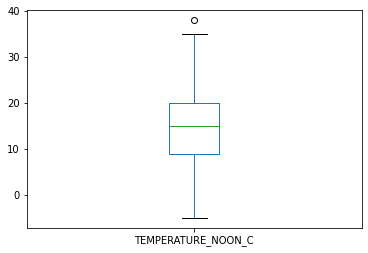

In [ ]:
df['TEMPERATURE_NOON_C'].plot.box()

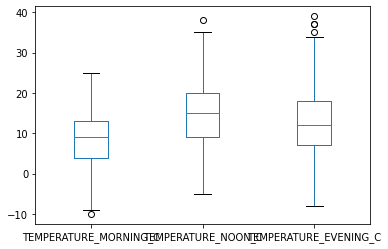

In [ ]:
df[['TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C']].plot.box()

####Histogram


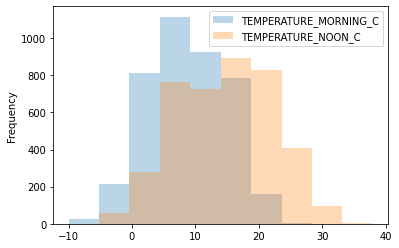

In [ ]:
df[['TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C']].plot.hist(alpha=0.3)

####Density

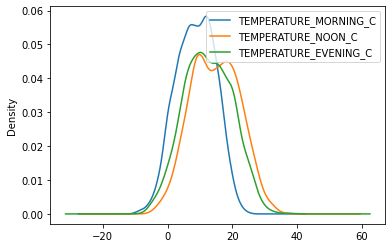

In [ ]:
df[['TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C']].plot.kde()

###Qualitative data

Pie plot

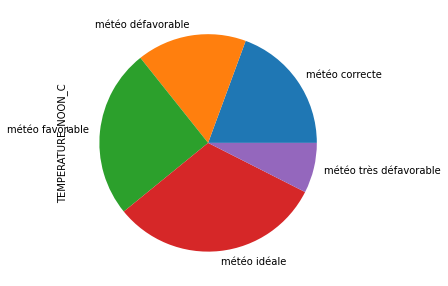

In [ ]:
data = df.groupby(['OPINION']).mean()['TEMPERATURE_NOON_C']
data.plot.pie(figsize=(5, 5))

####Bar plot


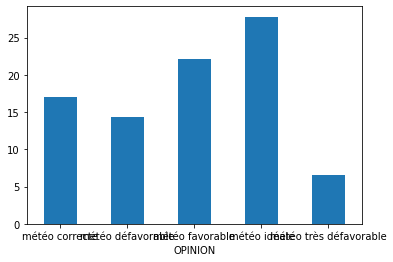

In [ ]:
data = df.groupby(['OPINION']).mean()['TEMPERATURE_NOON_C']
data.plot.bar(x='OPINION', y='TEMPERATURE_NOON_C', rot=0)

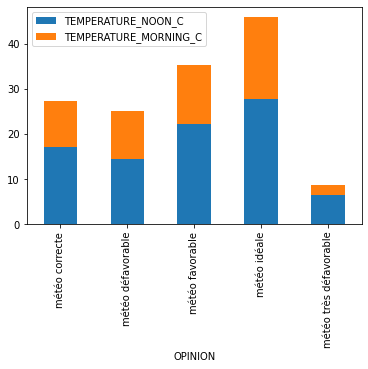

In [ ]:
data = df.groupby(['OPINION']).mean()[['TEMPERATURE_NOON_C', 'TEMPERATURE_MORNING_C']]
data.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4065cc8518>,
      dtype=object)

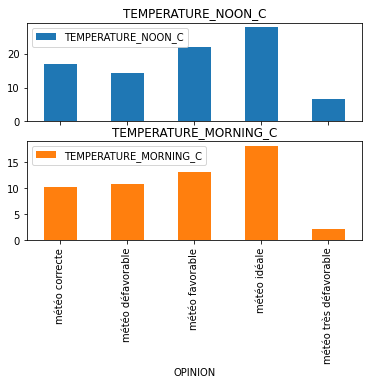

In [ ]:
data = df.groupby(['OPINION']).mean()[['TEMPERATURE_NOON_C', 'TEMPERATURE_MORNING_C']]
data.plot.bar(subplots=True)

####Horizontal barplot

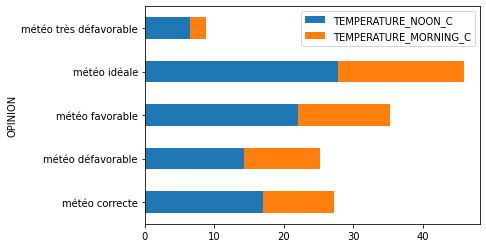

In [ ]:
data = df.groupby(['OPINION']).mean()[['TEMPERATURE_NOON_C', 'TEMPERATURE_MORNING_C']]
data.plot.barh(stacked=True)

## Ressources
- The awesome offical Pandas documentation [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/index.html).



---
Did you love it ? [Please visit my website](http://www.dcid-consulting.fr/) and lets' get in touch for special needs : consultancy, dedicated training, cut-in-the-edge development, etc.  
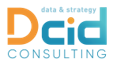  
Data science | Machine learning | Data analytics | Dataviz  